In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.model_selection import train_test_split

# importing statsmodels
import statsmodels.tsa.seasonal as seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


plt.style.use ('ggplot')

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
#selecting data path and file name
directory_path = r''
file = 'inv_process_bbg_data.xlsx'

df = pd.read_excel(file, sheet_name = 'CPI', index_col = 0, 
                   header=0, skiprows=0, parse_dates=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23520\3425462290.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel(file, sheet_name = 'CPI', index_col = 0,


In [3]:
df.head()

,CORRRMIN Index,COCPIYOY Index,COCPIMOM Index,COSEI12M Index,COCPXFFY Index,COCPXFYO Index,COCPNUYO Index,COIEORYY Index
Date,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2000-01-31 00:00:00,12,8.2500,1.2900,NaN,NaN,NaN,8.5800,NaN
2000-02-29 00:00:00,12,8.8900,2.3000,NaN,NaN,NaN,8.6500,NaN
2000-03-31 00:00:00,12,9.7300,1.7100,NaN,NaN,NaN,8.6700,NaN
2000-04-28 00:00:00,12,9.9600,1,NaN,NaN,NaN,8.6900,NaN


In [4]:
#Change column names
df.columns = ['TPM_COL','CPI_YoY','CPI_MoM','CPI_EXP_12M','CPI_EX_FOOD&REG','CPI_EX_FOOD','COCPNUYO Index','ISE']

#Drop NaNs in index 
df.drop(index = ['Date', np.NaN],inplace= True)

#Convert to float type
for item in df.columns:
    df[item] = df[item].astype(float)   

#Convert index to datetime
df.index = pd.to_datetime(df.index)

#Create month & year column
df['Month'] = pd.to_datetime(df.index).month
df['Year'] = pd.to_datetime(df.index).year

In [5]:
#shift expectations
df['CPI_EXP_12M_EXP_lag'] = df['CPI_EXP_12M'].shift(12)

<Axes: >

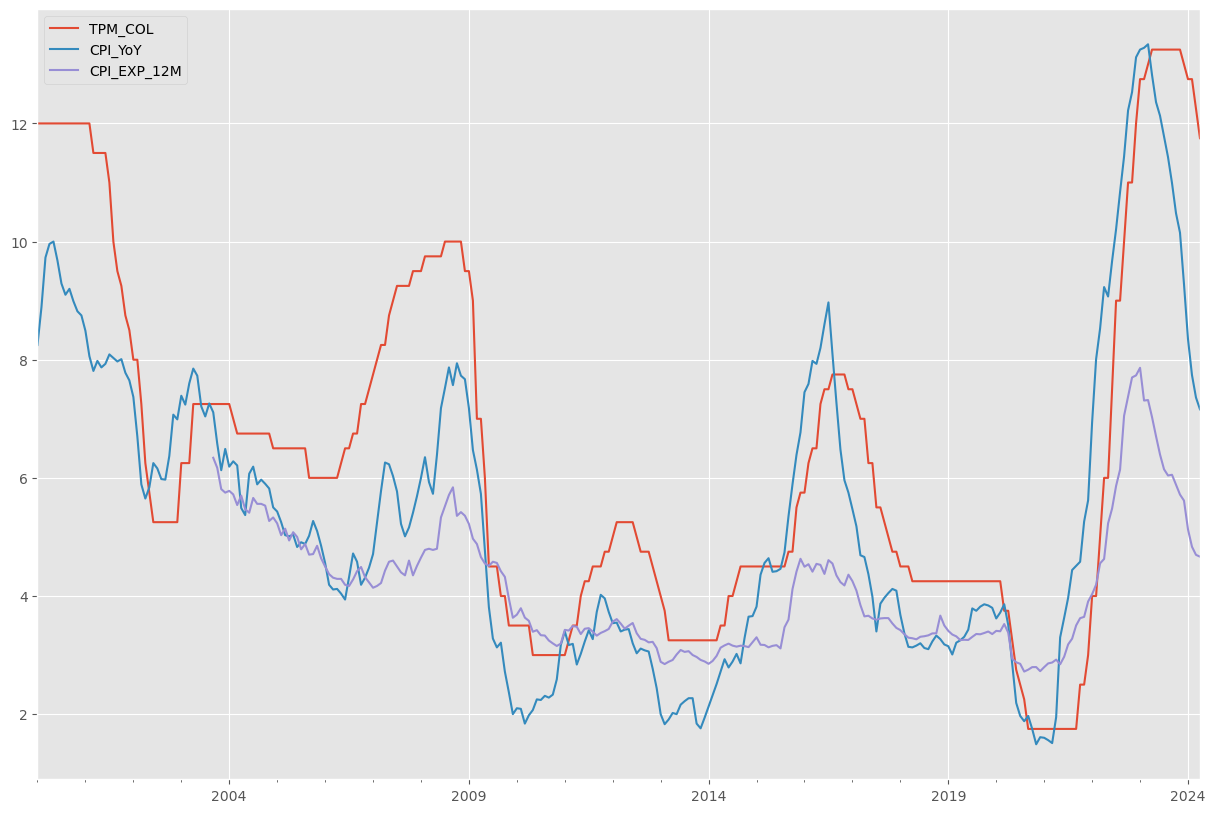

In [6]:

#Plot Monpol cip and expectations
df[['TPM_COL','CPI_YoY', 'CPI_EXP_12M']].plot(figsize = (15,10))

<Axes: >

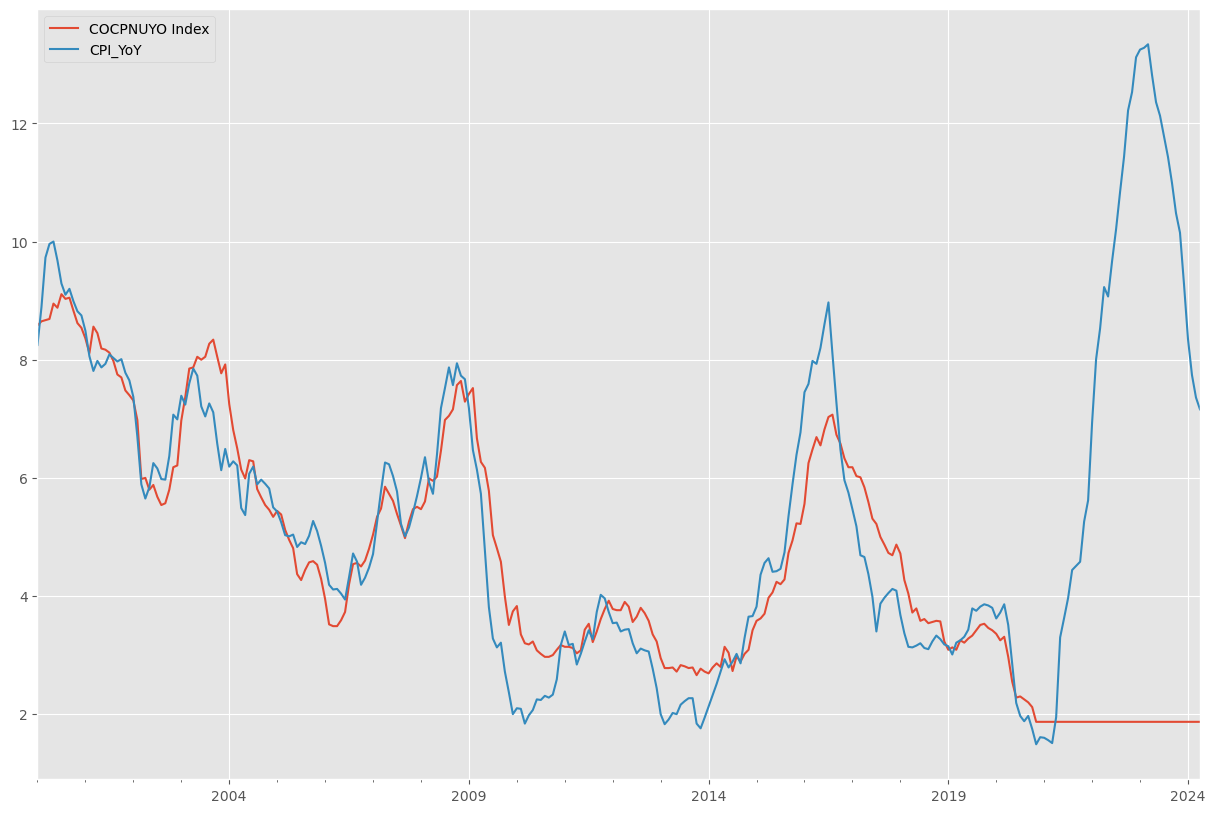

In [7]:
df[['COCPNUYO Index','CPI_YoY']].plot(figsize = (15,10))

In [8]:
#Generate year-month matrix 
cpi_mom = df.pivot_table(index = 'Year',columns = ['Month'])['CPI_MoM']

In [9]:
cpi_mom.describe()

Month,1,2,3,4,5,6,7,8,9,10,11,12
count,25.0000,25.0000,25.0000,25.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000
mean,0.8592,1.0592,0.7064,0.5908,0.3892,0.2058,0.1517,0.1904,0.2642,0.1363,0.2371,0.4075
std,0.3723,0.4648,0.4020,0.3179,0.2804,0.2610,0.2416,0.2782,0.2593,0.2464,0.2648,0.2513
min,0.3000,0.4400,0.1200,0.1200,-0.3200,-0.3800,-0.1400,-0.3200,-0.1900,-0.2600,-0.2200,0.0700
25%,0.6000,0.6600,0.4300,0.4500,0.2750,0.0700,-0.0325,0.0375,0.1250,-0.0225,0.1100,0.2675
50%,0.8000,1.0200,0.7000,0.5000,0.3550,0.1350,0.0800,0.1150,0.2900,0.1350,0.1850,0.3800
75%,1.0500,1.2600,0.9800,0.7800,0.4950,0.3400,0.2450,0.3125,0.3725,0.2000,0.3800,0.4675
max,1.7800,2.3000,1.7100,1.2500,1.0000,0.8600,0.8100,1.0200,0.9300,0.7200,0.7800,1.2600


Text(0.5, 1.0, 'MoM(%) Colombian CPI')

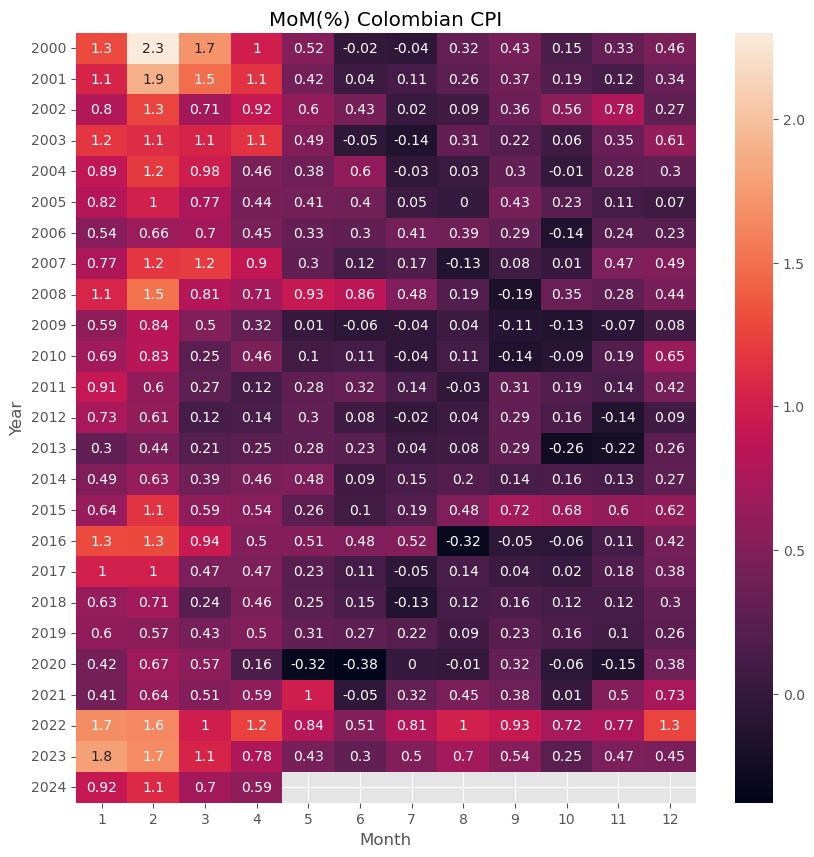

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cpi_mom,annot=True, ax = ax)
ax.set_title('MoM(%) Colombian CPI')

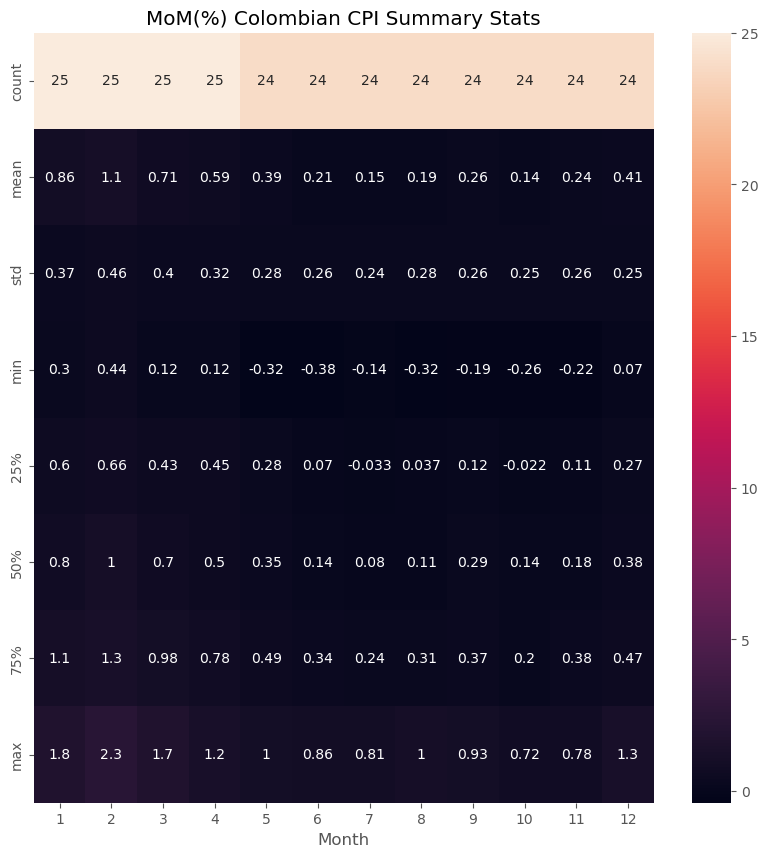

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cpi_mom.describe(),annot=True, ax = ax)
ax.set_title('MoM(%) Colombian CPI Summary Stats')
cpi_mom.describe().to_excel('cpi_mom_seag.xlsx')

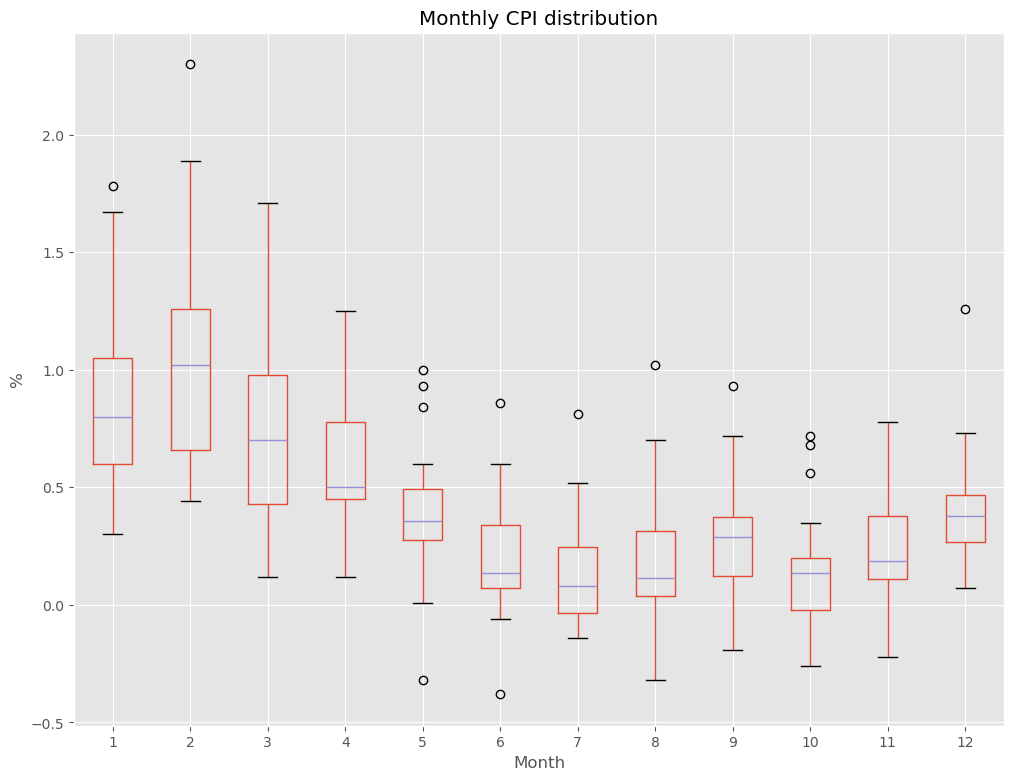

In [12]:
plt.figure(figsize=(12,9))
cpi_mom.boxplot()
plt.xlabel('Month')
plt.ylabel('%')
plt.title('Monthly CPI distribution');

## Arima model ##

In [14]:
mom = df['CPI_MoM'].copy()

<Figure size 1000x600 with 0 Axes>

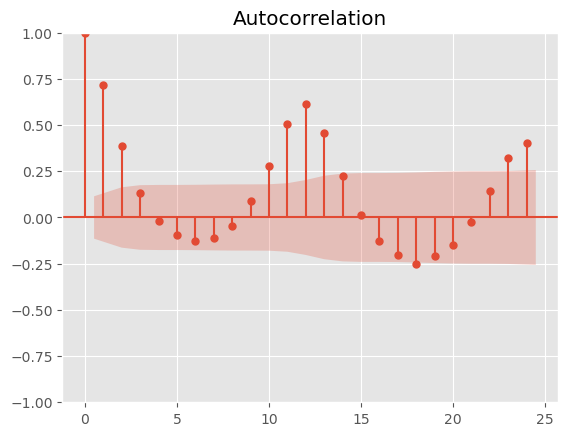

In [15]:
plt.figure(figsize=(10,6))
plot_acf(mom, lags = 24);

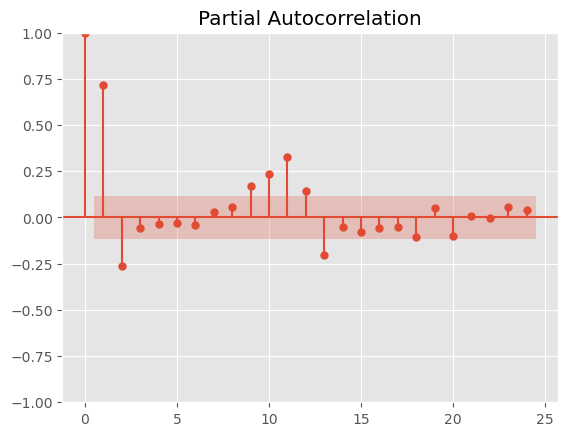

In [16]:
plot_pacf(mom, lags = 24, method = 'ywm');

In [17]:
#mom =pd.DataFrame(data = mom)

In [18]:
train_mom, test_mom = train_test_split(mom,test_size=0.05,shuffle = False)

In [19]:
mom.describe()

count   292.0000
mean      0.4382
std       0.4247
min      -0.3800
25%       0.1275
50%       0.3650
75%       0.6400
max       2.3000
Name: CPI_MoM, dtype: float64

In [20]:
train_mom.describe()

count   277.0000
mean      0.4243
std       0.4237
min      -0.3800
25%       0.1200
50%       0.3300
75%       0.6200
max       2.3000
Name: CPI_MoM, dtype: float64

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                CPI_MoM   No. Observations:                  277
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 -47.465
Date:                Wed, 04 Dec 2024   AIC                            108.929
Time:                        12:40:58   BIC                            134.298
Sample:                    01-31-2000   HQIC                           119.108
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4259      0.045      9.547      0.000       0.338       0.513
ar.L1          0.8731      0.055     15.778      0.000       0.765       0.982
ar.L2         -0.1931      0.093     -2.080      0.0

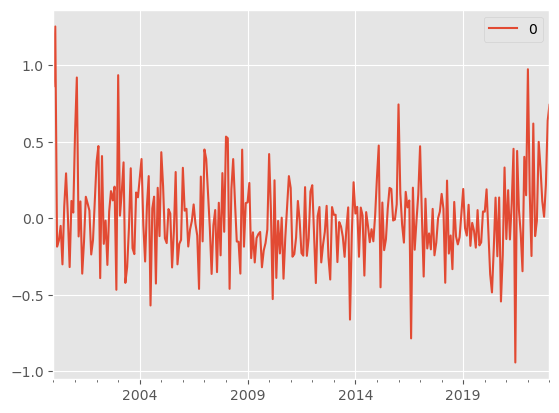

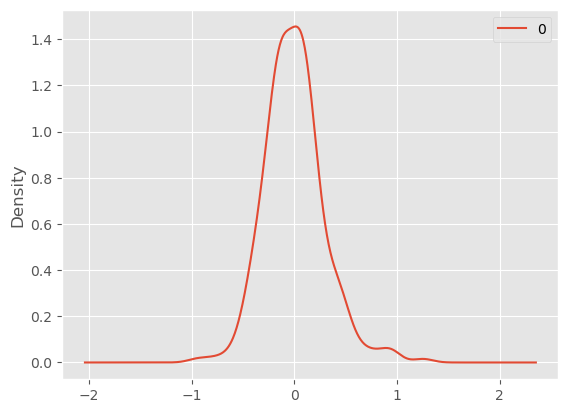

             0
count 277.0000
mean    0.0014
std     0.2906
min    -0.9416
25%    -0.1766
50%    -0.0148
75%     0.1510
max     1.2538


In [21]:

# fit model
model = ARIMA(train_mom, order=(5,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

<Axes: >

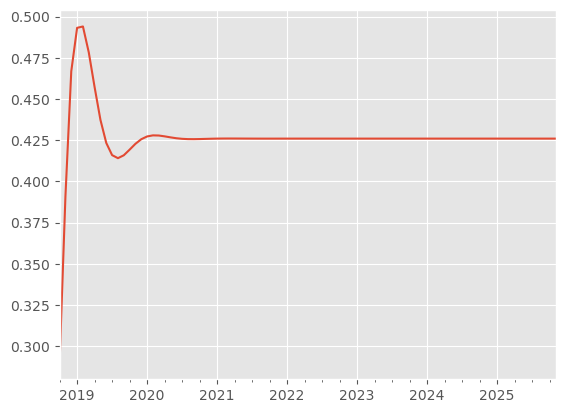

In [22]:
model_fit.predict(start=225,end=310,dynamic=True).plot()

### Sarima model

In [24]:
!pip install pmdarima

In [25]:
import pmdarima as pm

In [26]:
def forecast(ARIMA_model, df, periods=30):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='BM')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df, color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of MoM CPI")
    plt.show()
    return fitted



In [27]:
month_index = train_mom.index.month

In [28]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(train_mom, start_p=1, start_q=1,
                         test='adf',
                         max_p=12, max_q=12, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=0, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

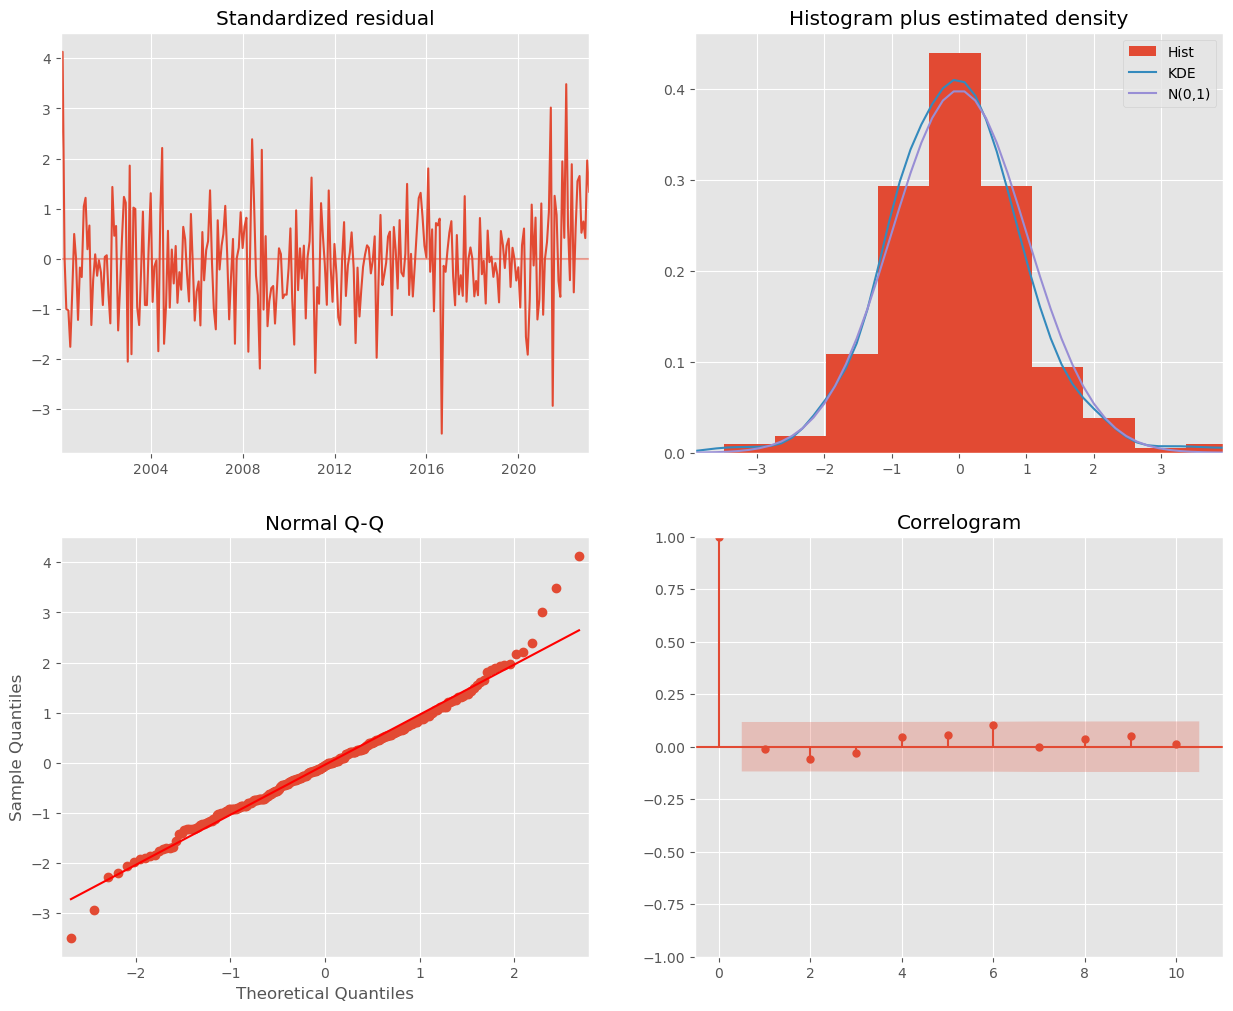

In [29]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23520\1872282125.py:5: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='BM')


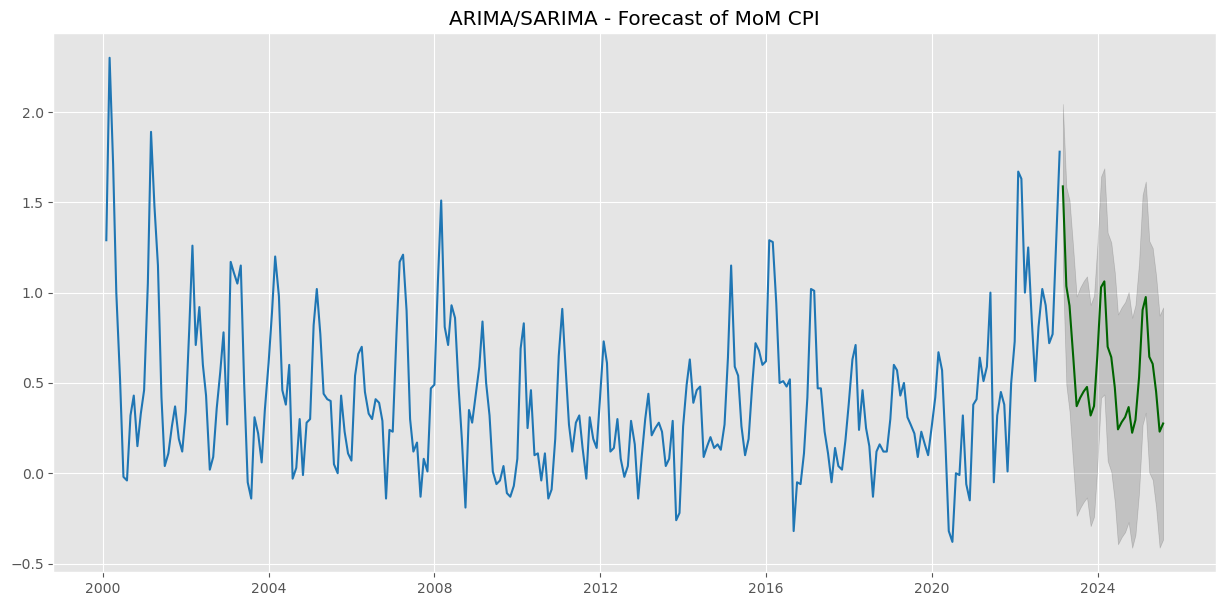

In [30]:
arim = forecast(SARIMA_model,train_mom)

In [31]:
arim.to_excel('col_cpi_mom_forecast.xlsx')

In [32]:
pd.DataFrame(arim)

,0
2023-02-28,1.5881
2023-03-31,1.0361
2023-04-28,0.9274
2023-05-31,0.6429
2023-06-30,0.3713
2023-07-31,0.4178
2023-08-31,0.4528
2023-09-29,0.4778
2023-10-31,0.3197
2023-11-30,0.3716


<Axes: >

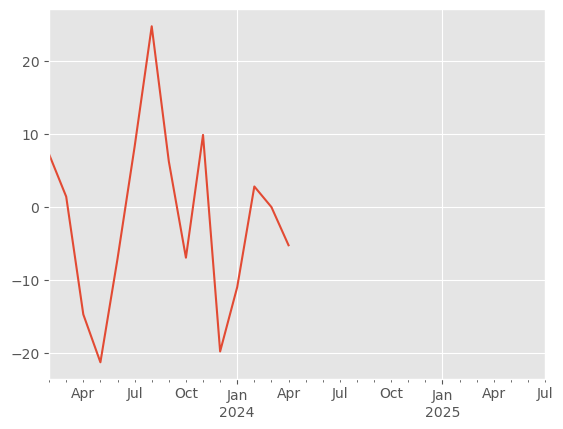

In [33]:
(100*(test_mom-arim)).plot()

In [34]:
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  277
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood                   3.737
Date:                                 Wed, 04 Dec 2024   AIC                              4.525
Time:                                         12:41:27   BIC                             26.269
Sample:                                     01-31-2000   HQIC                            13.250
                                          - 01-31-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.002      1.099      0.272      -0.002       0.006
ar.L1          0.6687      0.044     15.280      0.000       0.583       0.754
ar.S.L12       0.9865      0.011     92.253      0.000       0.966       1.007
ma.S.L12      -0.7119      0.065    -10.893      0.000      -0.840      -0.584
ma.S.L24      -0.1351      0.069     -1.946      0.052      -0.271       0.001
sigma2         0.0540      0.004     13.205      0.000       0.046       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                31.97
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.32
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Activity

In [36]:
train_mom, test_mom = train_test_split(df['ISE'].dropna(),test_size=0.05,shuffle = False)

In [37]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(train_mom, start_p=1, start_q=1,
                         test='adf',
                         max_p=12, max_q=12, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=0, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

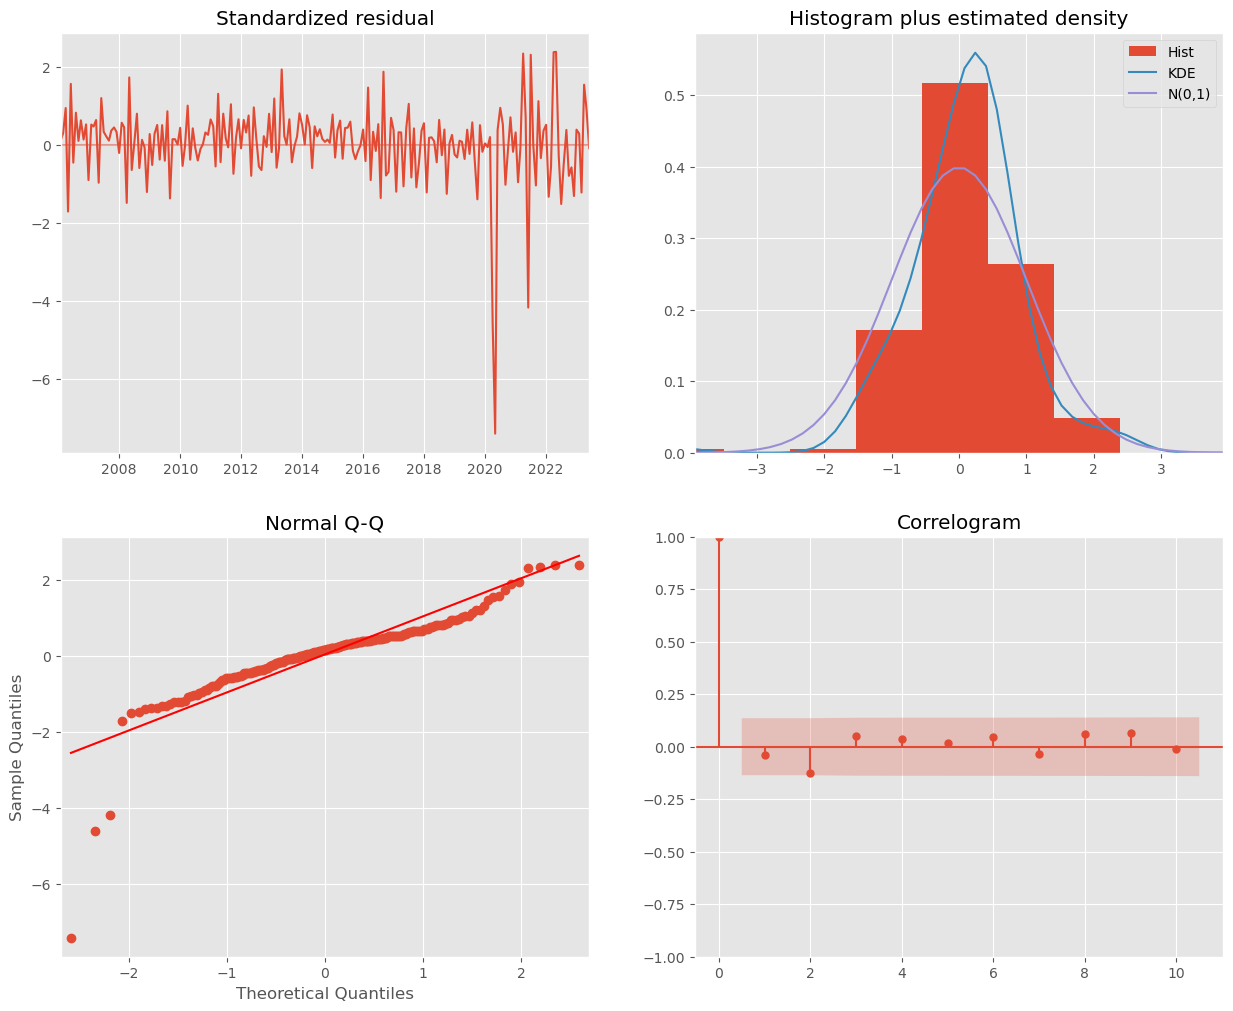

In [38]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23520\1872282125.py:5: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='BM')


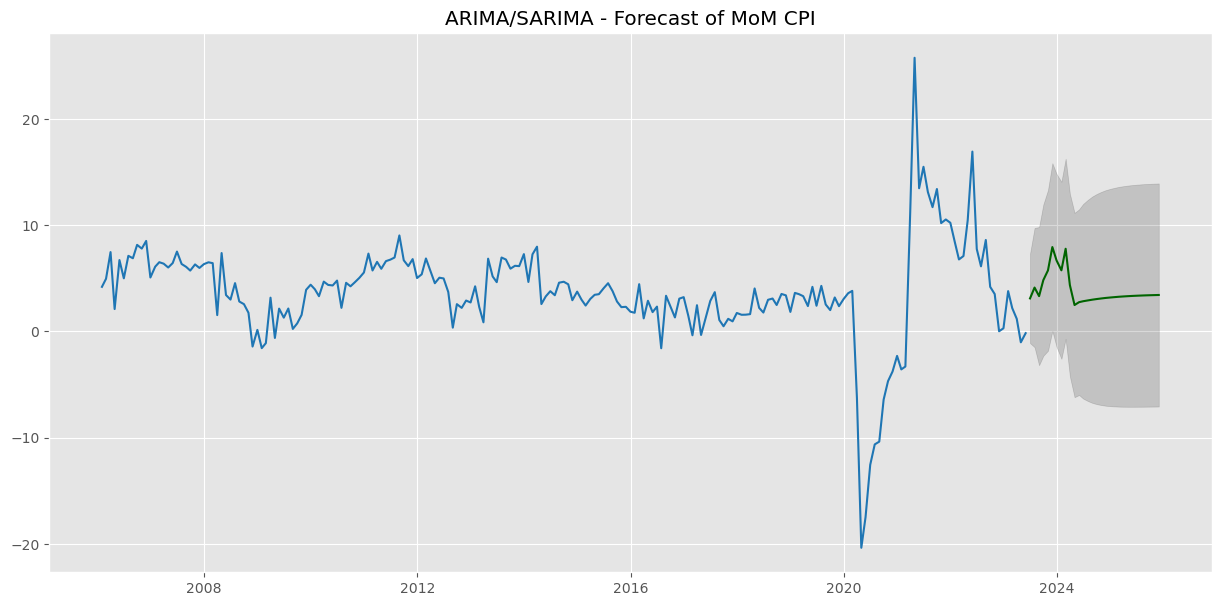

In [39]:
arim = forecast(SARIMA_model,train_mom)

#### SARIMAX with auto_arima

In [41]:


SARIMAX_model = pm.auto_arima(train_mom, exogenous=month_index,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=12, max_q=12, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

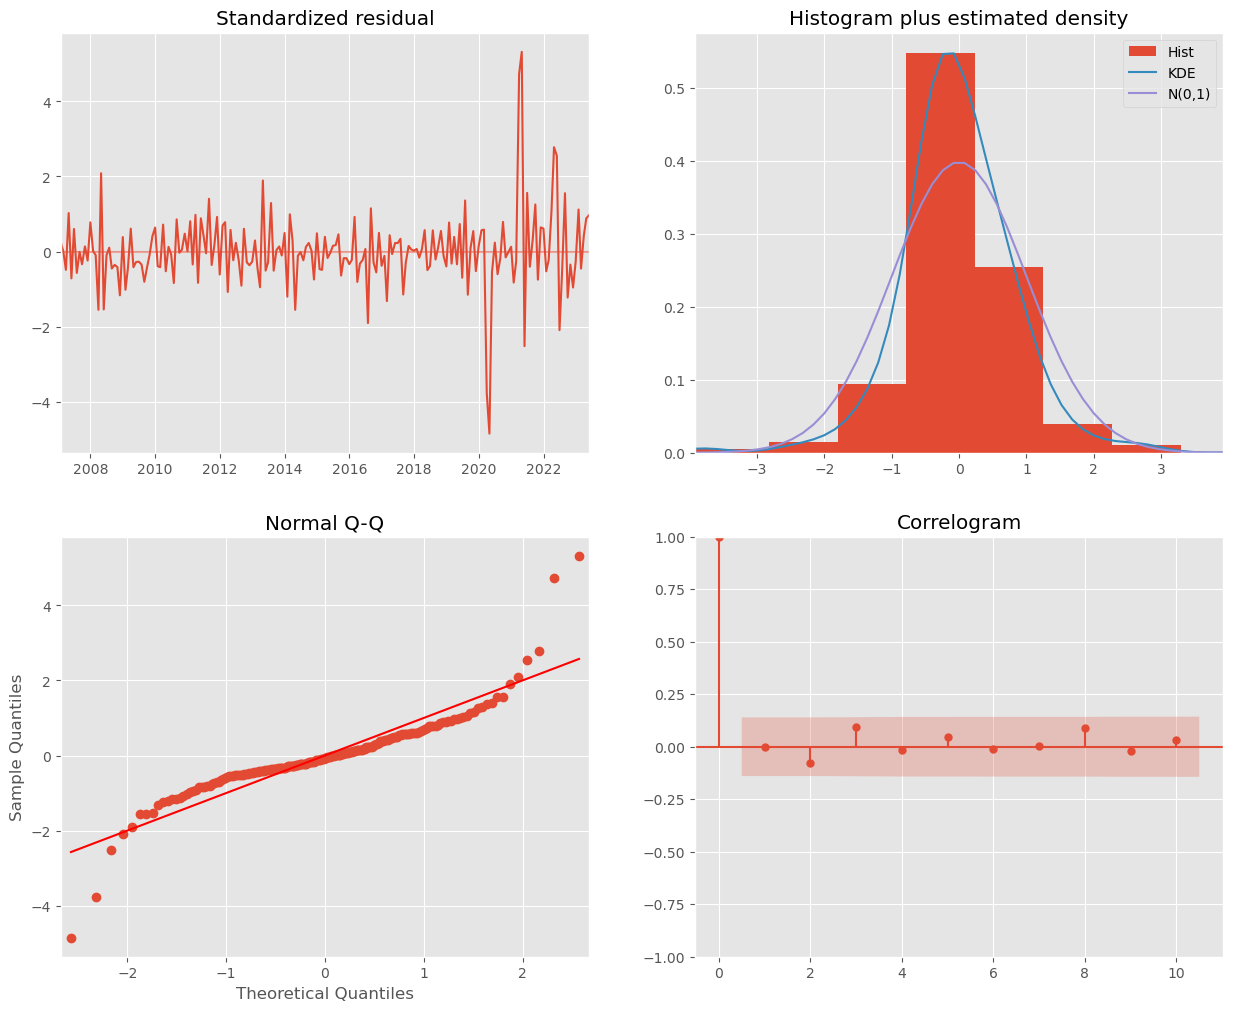

In [42]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23520\1872282125.py:5: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='BM')


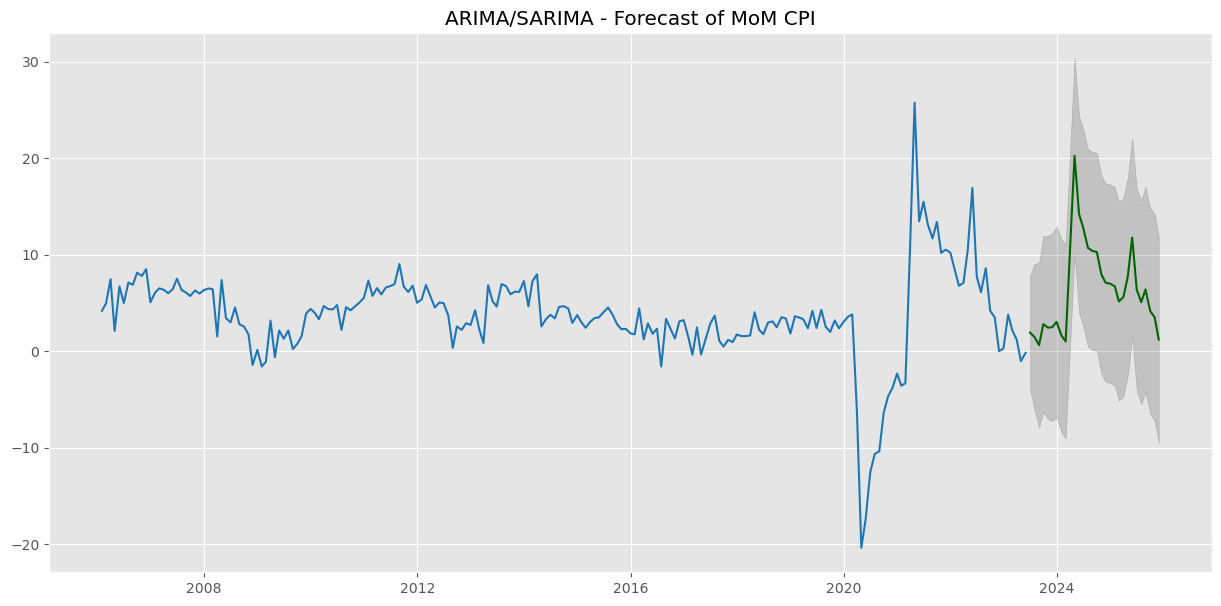

In [43]:
frc = forecast(SARIMAX_model,train_mom)

<Axes: >

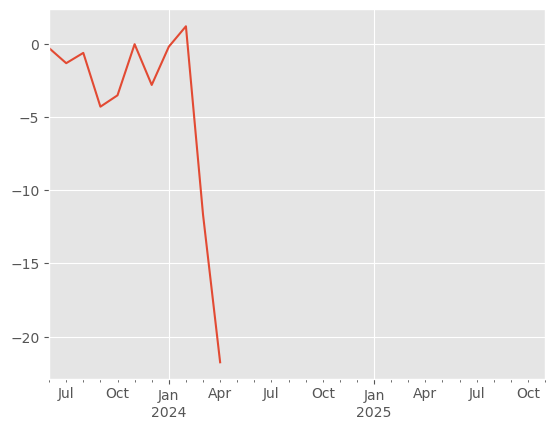

In [44]:
(test_mom-frc).plot()

<Axes: >

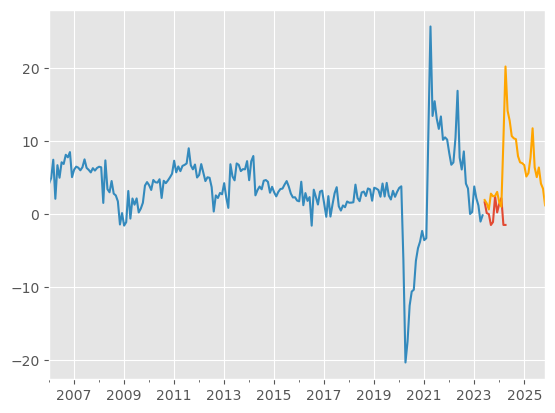

In [45]:
test_mom.plot()
frc.plot(label=True,color='orange')
#predicted.plot(label=True)
train_mom.plot(label=True)

<Axes: >

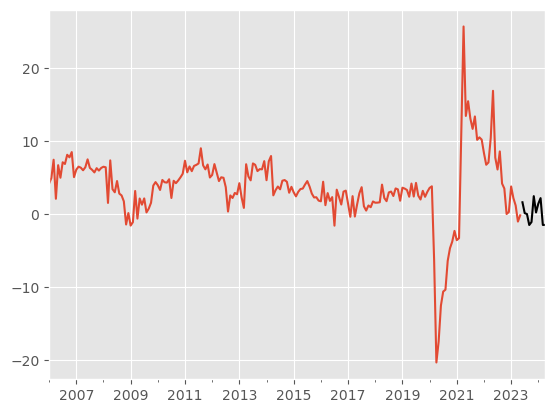

In [46]:
test_mom.plot(color='black')
train_mom.plot()

In [47]:
SARIMAX_model

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

 ### SARIMAX ###

In [49]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(train_mom,order=(6, 0, 1),seasonal_order=(6,0,1,12))#, enforce_stationarity=False)
results=model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

In [ ]:
residuals = pd.DataFrame(results.resid)
residuals.plot(title='Residuals')
plt.show()
# density plot of residuals
residuals.plot(kind='kde',title='Density of residuals')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
residuals.count()[0]

In [ ]:
results.predict(start=residuals.count()[0]+1,end=residuals.count()[0]+1+48,dynamic=True).plot(title='COL MoM CPI forecast')

In [ ]:
predicted = results.predict(start=residuals.count()[0]+1,end=residuals.count()[0]+1+72,dynamic=True)
pd.DataFrame(predicted)

In [ ]:
plt.figure(figsize=(10,7))

test_mom.to_csv('test.csv')
predicted.to_csv('predicted.csv')
(test_mom - predicted).to_csv('error.csv')
(test_mom - predicted).plot(title='Test vs forectas - error')
plt.show()

### Anotations ###